In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install pycryptodome

In [3]:
import base64
import hashlib 

In [5]:
# Reading input Image and encoding it using base64
with open("/content/drive/MyDrive/CSS_Exp10_AES/pics/eiffelTower.jpg", "rb") as img_file:
    BI = base64.b64encode(img_file.read())
print(BI)
BI = BI.decode("utf-8")


b'/9j/4AAQSkZJRgABAQAAAQABAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZX

In [6]:
# My key
K = ""
f = open('/content/drive/MyDrive/CSS_Exp10_AES/mykey.txt','r')
for i in f:
    K += i
f.close()
K

'This is myKey.'

In [7]:
SK = hashlib.sha256(K.encode()) 

print("The hexadecimal equivalent of SHA256 is : ") 
print(SK.hexdigest())

The hexadecimal equivalent of SHA256 is : 
9b23f33bdb9c8734438ddace43163b5827e83be243882d4c403a7219768d62fd


In [8]:
# AES 256 in OFB mode:
from Crypto.Cipher import AES 
from Crypto.Random import new as Random
from hashlib import sha256
from base64 import b64encode,b64decode

class AESCipher:
    def __init__(self,data,key):
        self.block_size = 16
        self.data = data
        self.key = sha256(key.encode()).digest()[:32]
        self.pad = lambda s: s + (self.block_size - len(s) % self.block_size) * chr (self.block_size - len(s) % self.block_size)
        self.unpad = lambda s: s[:-ord(s[len(s) - 1:])]

    def encrypt(self):
        plain_text = self.pad(self.data)
        iv = Random().read(AES.block_size)
        cipher = AES.new(self.key,AES.MODE_OFB,iv)
        return b64encode(iv + cipher.encrypt(plain_text.encode())).decode()

In [9]:
c = AESCipher(BI,SK.hexdigest()).encrypt()
print(c)

UyHPXGkp+rnLm1CSLsSj8uYYetIMbqbrf8UsTft0QjbcGmKT/EZ8U0o/laOyzXXk49j6SjwJIrzauCbYhfcCvZJrtsBGSQWCcgargM+196E5JJivO0oUpW0n5J4Wypgl3A9TnrKw1VErD27FORATWlcvERDgzDqkAdrh2QbfmTtFlEdlq2anDrY2a2/eGITeee8KiICl1gNGskONaJ96Aex5yaSjtAiW2tM19cx2ql9txZLgGRdkOQryHvX3/z3WBbE7u8b13r9rqwf/ioJgK/i3prCP/mV8/x63AuuS61y+kIaRv/zcy6cpEfce3ZWSVMXRByOs6CkVVfjwFp8VnWlv0ycJ1N81TSHotXBbWKEo2gAMVXhBbJFkyVincJTB/MZS6U00sTbtuUWYdHDHVIG+rfmg3BkRtAwxLnaCZq1+h09b4IgryzZ+cNRG34jNl6Tq+HZ50mYCCeDjqy62egwW5t8JIt3N+xeM/Q4ljLZvVyxqQFOcRoZcD+SSfd5w7EkIfDmB7NDOBF8E6B26HZlP8N1L7ldLGpRuGhJ5saOlIbZdok//2/pl4P1FVeeN8OAtt5/02HRy28RYm7lVcGDQSRLvPlg0uOc+2Q2flRlGp59PMdXUOKDr3R70fXU/zgrEFU7jtxHIPXzXq0IvWwR4lnEdijxRhx22uvH2W1/xn+NyOVVFLy3ZAeOIaQrmv2XAFQLbEf9YQ7AsfjHfkdc8JvwrDXnEgwBN0GYKGx5GpVwcFyjarxJnmz5oCsjMXaeL9DvQ3o9/cPHzlKWplhi49l4YlEd03LuKv4cC1oO0AQnoeI3SrCkxuEwXAvrLCFvqPT/v7+rJfzqejZDv9zuK5ZmPACj5QSps6BRfG0P/dCwAJbSmlf9fqm5+8c1hz3gcmHPyKlLMYQuCc0vsvZ3I1pSe1iQsmezYDXZIKgzamFnlDmNttXLgW8C3qo94RdGJOYvR+Rfl8sXxiXNOyHxphbnc+9fxku15307p

In [10]:
f = open("/content/drive/MyDrive/CSS_Exp10_AES/Decrypt/encrypt-final.txt",'w')
f.write(c)
f.close()

In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow 
from matplotlib import pyplot as plt

In [12]:
w = 255
h = len(K)
#print(h)

In [13]:
# creating new Image C of size(w,h) 
# initializing as blank
C = np.ones((h,w,1), dtype = 'uint8')

In [14]:
# Filling pixels in C
for i in range(h):
    j = ord(K[i])
    #print(j)
    for k in range(w):
        if k < j:
            C[i][k][0] = 0
        else:
            break

In [15]:
# Dividing C into R and P
# initializing R and P of same size as C
R = np.ones((h,w,3), dtype = 'uint8')
P = np.ones((h,w,3), dtype = 'uint8')

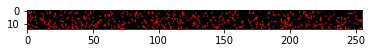

In [16]:
for i in range(h):
    for j in range(w):
        r = np.random.normal(0,1,1)
        R[i][j][0] = r
plt.imshow(R)

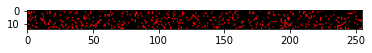

In [17]:
for i in range(h):
    for j in range(w):
        p = R[i][j][0] ^ C[i][j][0]
        P[i][j][0] = p
plt.imshow(P)

In [18]:
filename = '/content/drive/MyDrive/CSS_Exp10_AES/Decrypt/key-1_fromR_sent.png'
cv2.imwrite(filename, R)

True

In [19]:
filename = '/content/drive/MyDrive/CSS_Exp10_AES/Decrypt/key-2_fromP_sent.png'
cv2.imwrite(filename, P)

True